# Load libraries 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 2

# Load data 

In [12]:
data = pd.read_csv('test.csv')

# Plot params 

In [13]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

# Needed preprocessing 

In [14]:
def vonmise_derivative(xdata, a = 25, kai = 4):
    xdata = xdata / 75 * np.pi
    return - a / (i0(kai) * 2 * np.pi) * exp(kai * cos(xdata)) * kai * sin(xdata) # Derivative of vonmise formula

In [15]:
def getRunningMean(stimuli_diff, filtered_responseError, halfway =74, step = 8):
    RM = [None] * (2 * halfway + 1); # running mean initialization
    xvals = list(range(-halfway, halfway + 1)) # index for running mean -90~90 + -90~90 (avoid error in sep[jj] == 91\92...
    allx_vals = xvals + xvals
    for ii in range(0,len(xvals) - 1): # start running mean calculation 0~180
        if ii - step // 2 >= 0:
            sep = allx_vals[(ii - step // 2) : (ii + step // 2 + 1)] # symmetric to avoid shift
        else:
            sep = allx_vals[(ii - step // 2) : len(allx_vals)] + allx_vals[0 : (ii + step // 2 + 1)]
        sep_sum = []
        for jj in range(0,len(sep)): # match every value in sep to every stimuli_diff point
            for kk in range(0, len(stimuli_diff)):
                if stimuli_diff[kk] == sep[jj]:
                    sep_sum.insert(0, filtered_responseError[kk])
        RM[ii] = np.mean(sep_sum)
    RM[2 * halfway] = RM[0]
    return RM, xvals

In [16]:
def getRegressionLine(x, y, peak):
    stimuli_diff_filtered = []
    filtered_responseError_new = []
    for i in range(len(x)):
        if x[i] < peak + 1 and x[i] > - peak + 1:
            stimuli_diff_filtered.append(x[i])
            filtered_responseError_new.append(y[i])
    coef = np.polyfit(stimuli_diff_filtered,filtered_responseError_new,1)
    poly1d_fn = np.poly1d(coef)
    return poly1d_fn, coef

In [17]:
## Von Mise fitting: Shape Similarity##
init_vals = [25, 4]
best_vals, covar = curve_fit(vonmise_derivative, data['Stim_diff'], data['responseError'], p0=init_vals)

In [46]:
#### RUNNING MEAN ####
RM, xvals = getRunningMean(data['Stim_diff'], data['responseError'], step = 20)

# Plot figure 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


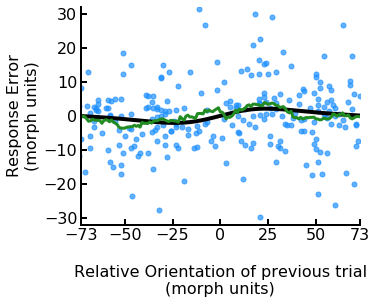

In [58]:
plt.figure(figsize=(5, 4))
plt.plot(data['Stim_diff'], data['responseError'], color='dodgerblue', marker='o', linestyle='none', alpha=0.7, markersize=5)
x = np.linspace(-75, 75, 300)
y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in x]
DoVM_values = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in data['Stim_diff']]
plt.plot(x, y, '-', linewidth = 4, color='k')
plt.plot(xvals, RM, label = 'Running Mean', color = 'forestgreen', linewidth = 3)
peak_x = (x[np.argmax(y)])
poly1d_fn, coef = getRegressionLine(x = data['Stim_diff'], y= data['responseError'], peak = peak_x)
xdata = np.linspace(-peak_x, peak_x, 100)
# plt.plot(xdata, poly1d_fn(xdata), linestyle='--', color='powderblue', linewidth = 4)
plt.xlim([-73, 73])
plt.ylim([-32, 32])
plt.yticks(np.arange(-30, 40, 10))
# plt.xticks(np.arange(-70, 80, 20))
plt.xticks([-73, -50, -25, 0, 25, 50, 73])
sns.despine()
# print(coef[0], coef[1])
plt.ylabel('Response Error\n(morph units)')
plt.xlabel('\nRelative Orientation of previous trial\n(morph units)')
plt.savefig('ShapeDiff_DerivativeVonMises.eps', bbox_inches='tight', dpi=1200)

In [49]:
max(data['Stim_diff'])

73.0